In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

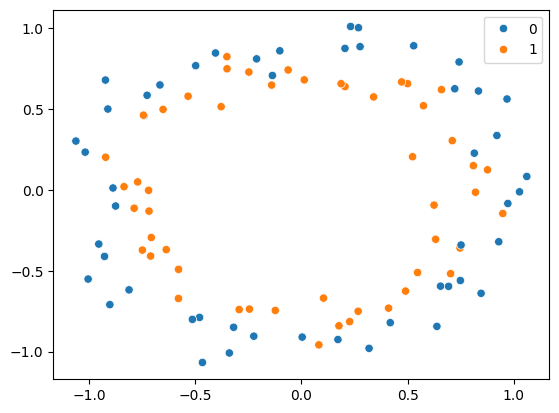

In [3]:
sns.scatterplot(x = X[:,0], y = X[:,1],hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

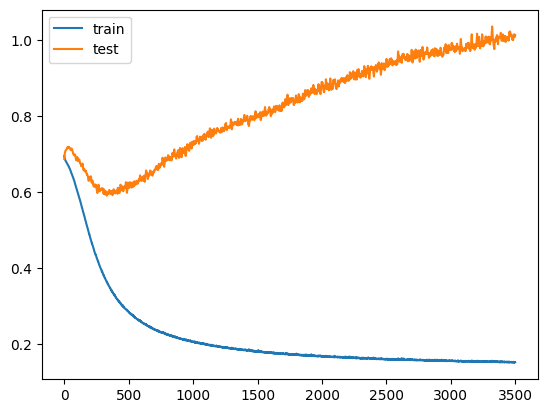

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 732us/step


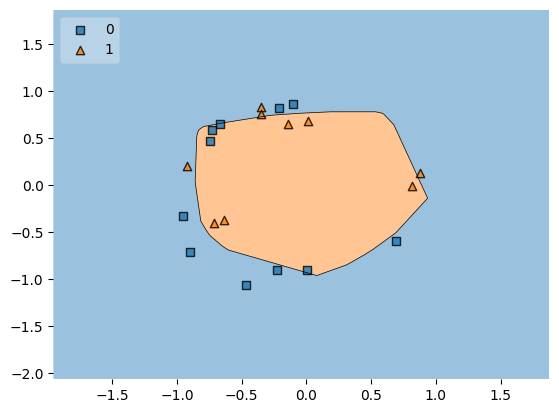

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [10]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Explanations of the key parameters for the **EarlyStopping** callback:

1. **`monitor`**:  
   - Specifies which quantity (metric) to watch for improvements.
   - Common choices: `"val_loss"` (validation loss), `"accuracy"`, `"val_accuracy"`, etc.
   - Default: `"val_loss"`.

2. **`min_delta`**:  
   - The minimum amount that the monitored quantity must improve to be considered an improvement.
   - If the change is smaller than `min_delta`, it’s treated as no improvement.
   - Default: `0` (any improvement, however small, is considered).

3. **`patience`**:  
   - The number of epochs to wait after the last improvement before stopping training.
   - For example, if `patience=3`, training will stop if there’s no improvement for 3 consecutive epochs.
   - Default: `0` (stops immediately after no improvement).

4. **`verbose`**:  
   - Controls the display of messages.
   - `0`: No messages are shown.
   - `1`: Displays messages when EarlyStopping takes action.
   - Default: `0`.

5. **`mode`**:  
   - Determines whether you’re trying to minimize or maximize the monitored metric.
   - Options:
     - `"min"`: Stops when the monitored metric stops decreasing (useful for loss).
     - `"max"`: Stops when the metric stops increasing (useful for accuracy).
     - `"auto"`: Keras automatically infers the correct mode based on the metric name (e.g., `"val_loss"` uses `"min"` mode).
   - Default: `"auto"`.

6. **`baseline`**:  
   - Specifies a baseline value for the monitored quantity.
   - If provided, training will stop if the model doesn’t show improvement beyond this baseline.
   - Default: `None`.

7. **`restore_best_weights`**:  
   - If `True`, restores the model’s weights to the best-performing epoch (in terms of the monitored metric) once training stops.
   - Default: `False` (keeps the weights from the last training epoch).

8. **`start_from_epoch`**:  
   - Specifies how many epochs to wait before beginning to monitor for improvements.
   - Allows for a "warm-up" period where no stopping is done.
   - Default: `0`.

In [12]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5273 - loss: 0.6922 - val_accuracy: 0.4500 - val_loss: 0.6993
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5688 - loss: 0.6913 - val_accuracy: 0.4000 - val_loss: 0.7004
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5469 - loss: 0.6906 - val_accuracy: 0.4000 - val_loss: 0.7005
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5484 - loss: 0.6900 - val_accuracy: 0.4000 - val_loss: 0.7004
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5719 - loss: 0.6862 - val_accuracy: 0.4000 - val_loss: 0.7011
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5422 - loss: 0.6872 - val_accuracy: 0.4000 - val_loss: 0.7019
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5094 - loss: 0.6913 - val_accuracy: 0.4000 - val_loss: 0.7029
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5055 - loss: 0.6915 - val_accuracy: 0.4000 - 

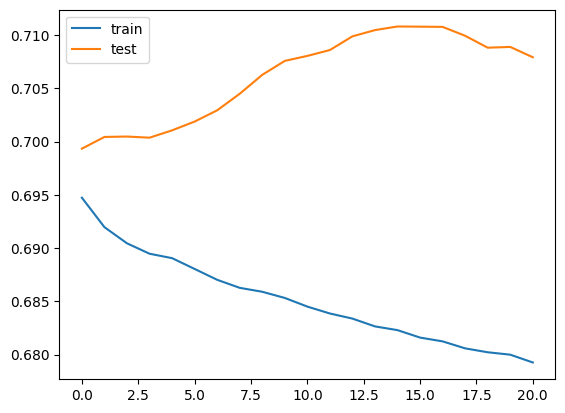

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 746us/step


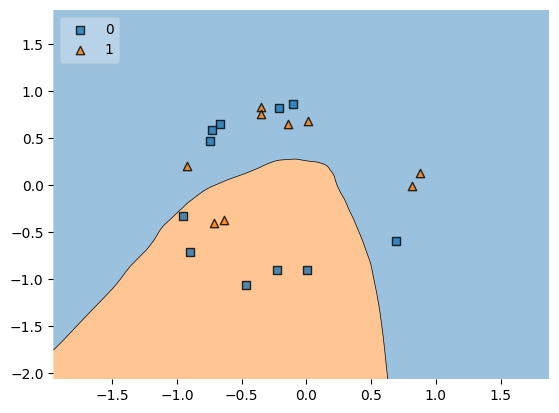

In [15]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

some how this model is not going till 350 epochs by shown in graph